In [1]:
# Basic Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Model skitlearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model, to_categorical

### Read the dataset

In [3]:
train_df = pd.read_csv('train.csv', index_col='row_id')
test_df = pd.read_csv('test.csv', index_col='row_id')
train_df.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
row_id,,,,,,,,,,,,,,,,,,,,,
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


Number of Unique target

In [4]:
targets = train_df.target.unique()
print("Number of the target: {}".format(targets))

Number of the target: ['Streptococcus_pyogenes' 'Salmonella_enterica' 'Enterococcus_hirae'
 'Escherichia_coli' 'Campylobacter_jejuni' 'Streptococcus_pneumoniae'
 'Staphylococcus_aureus' 'Escherichia_fergusonii' 'Bacteroides_fragilis'
 'Klebsiella_pneumoniae']


In [7]:
train_df.reset_index(inplace=True)

In [8]:
train_df['target'].value_counts(normalize = True)

Bacteroides_fragilis        0.100695
Streptococcus_pyogenes      0.100380
Streptococcus_pneumoniae    0.100370
Campylobacter_jejuni        0.100315
Salmonella_enterica         0.100150
Escherichia_coli            0.099790
Enterococcus_hirae          0.099735
Escherichia_fergusonii      0.099685
Staphylococcus_aureus       0.099645
Klebsiella_pneumoniae       0.099235
Name: target, dtype: float64

Remove the axis

In [9]:
train_df.drop('row_id', axis = 1, inplace = True)

The output is highly skewed to the left. Which indicates the over centralize the around 0 to 0.02

<ipython-input-8-1dd9e0659bcf>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


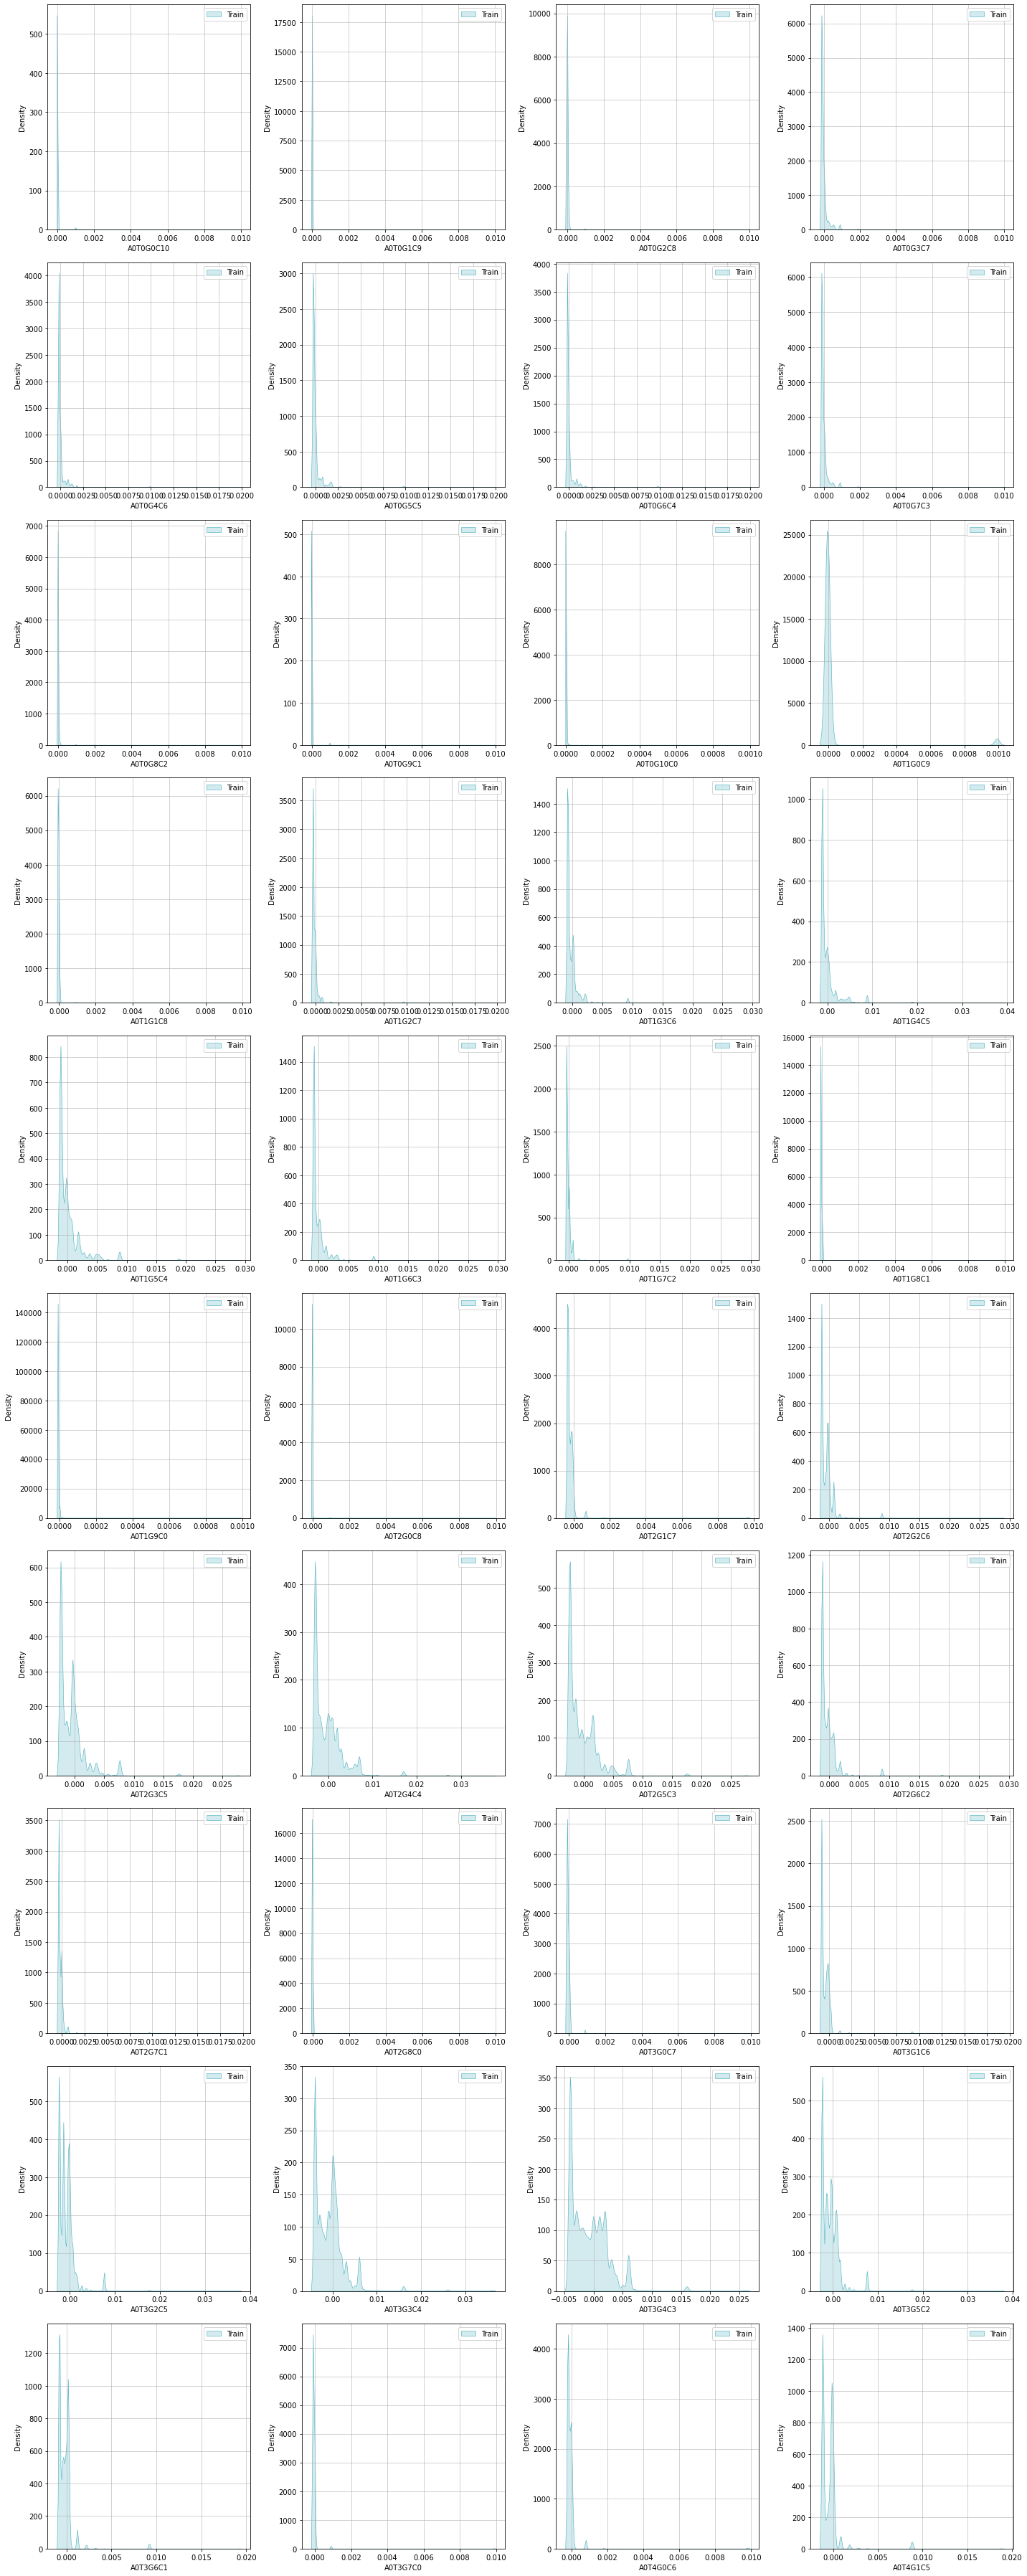

In [8]:
#Visualizing first few rows
numerical = train_df.columns[train_df.dtypes != "object"].to_numpy()
fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 4
for idx, num in enumerate(numerical[:40]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ='#50B2C0',linewidth=0.6, data = train_df, label = "Train") 
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

### PCA

In [9]:
from sklearn.decomposition import IncrementalPCA
X = train_df.copy()
y = X.pop('target')

In [10]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=10)
for X_batch in np.array_split(X, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X)

....................................................................................................

In [13]:
columns = ['PCA_feature_'+str(i) for i in range(1,11)]
X_add_columns = pd.DataFrame(X_reduced, columns=columns)
X_add_columns.head()

,PCA_feature_1,PCA_feature_2,PCA_feature_3,PCA_feature_4,PCA_feature_5,PCA_feature_6,PCA_feature_7,PCA_feature_8,PCA_feature_9,PCA_feature_10
0,-0.006646,0.069852,0.023745,-0.018439,-0.003930,-0.008891,0.012701,0.002436,-0.006064,0.011729
1,0.025797,0.006774,0.008331,0.003310,-0.008549,0.011344,-0.004225,0.002149,-0.002716,0.000115
2,0.029070,-0.005514,-0.000655,0.001594,0.002283,-0.001905,0.002195,-0.000505,0.001111,-0.000848
3,0.032686,-0.006226,-0.005940,-0.003983,0.002146,-0.000697,0.000956,-0.001359,0.000245,0.000186
4,-0.042883,0.053586,-0.009964,0.011817,0.040624,0.015681,-0.004855,0.012559,0.011566,-0.002600


In [14]:
scaler = StandardScaler()
scaler.fit(X_add_columns)
X_redScaled = pd.DataFrame(scaler.transform(X_add_columns), columns=columns)

<ipython-input-15-0a4ec1c0b65e>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


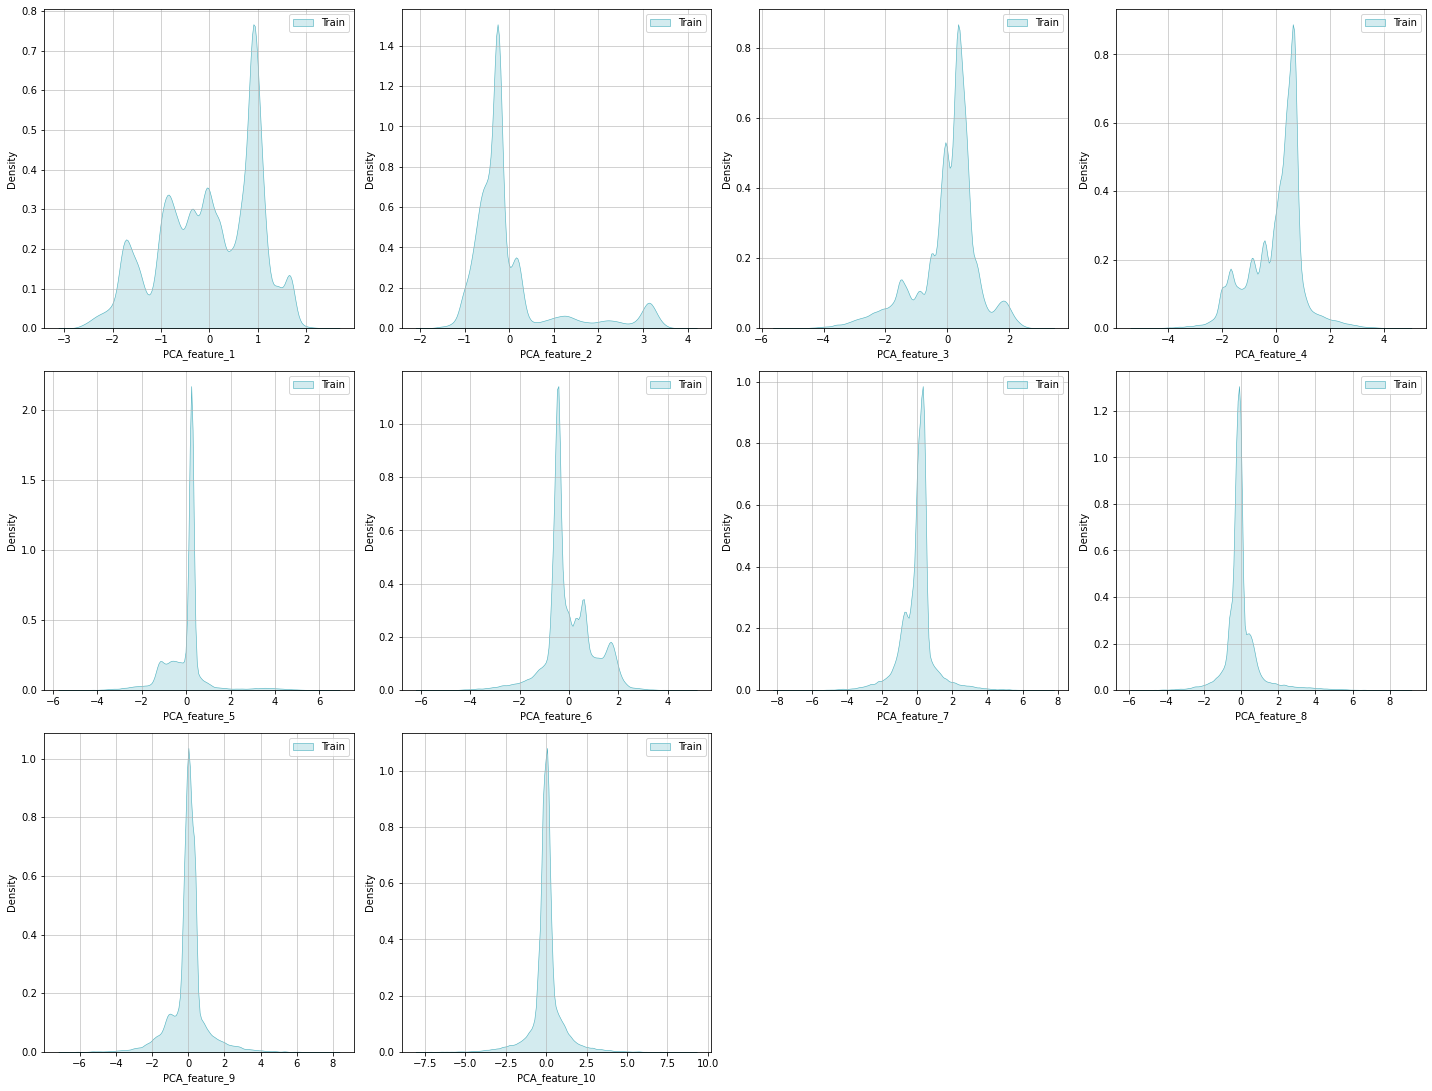

In [15]:
#Visualizing first few rows
numerical = X_redScaled.columns[X_redScaled.dtypes != "object"].to_numpy()
fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 4
for idx, num in enumerate(numerical[:40]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ='#50B2C0',linewidth=0.6, data = X_redScaled, label = "Train") 
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

### Re-ensemble

In [16]:
full_data = X_redScaled.copy()
full_data['target'] = y

Due to the PCA, there will be simliar data existed which could require to drop the duplication.

In [17]:
print('Before dropping duplicates:', len(full_data))
og_data = len(full_data)
print('Dropping Duplicates.......')
full_data.drop_duplicates(inplace=True)
print('After dropping duplicates:', len(full_data))
print('Numbers of duplicates: ',(og_data - len(full_data)))

Before dropping duplicates: 200000
Dropping Duplicates.......
After dropping duplicates: 123993
Numbers of duplicates:  76007


### Training Data Setup

In [23]:
target = full_data['target']
full_data.drop('target', axis=1, inplace=True)
X_train_full, X_test, y_train_full, y_test = train_test_split(full_data, target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

KeyError: 'target'

### Label Encoding

In [24]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)
y_valid = encoder.transform(y_valid)

In [25]:
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = X_train.columns + ["target"]
header = ",".join(header_cols)

In [26]:
columns_name = list(train_df.columns)

In [32]:
# build the model
model = Sequential()
model.add(tf.keras.layers.Dense(256, input_dim = 10, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [33]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               2816      
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               131584    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 10)               

In [34]:
early_stopping = EarlyStopping(
    patience=10, 
    min_delta=0.001, 
    restore_best_weights=True)
history = model.fit(x = X_train, 
                    y = y_train, 
                    epochs= 50, 
                    validation_data = (X_valid, y_valid),
                    , 
                    steps_per_epoch=len(X_train) // 32)

Epoch 1/50
2179/2179 [==============================] - 14s 5ms/step - loss: 0.6019 - accuracy: 0.7764 - val_loss: 0.3784 - val_accuracy: 0.8363
Epoch 2/50
2179/2179 [==============================] - 10s 5ms/step - loss: 0.4047 - accuracy: 0.8330 - val_loss: 0.3217 - val_accuracy: 0.8664
Epoch 3/50
2179/2179 [==============================] - 10s 4ms/step - loss: 0.3748 - accuracy: 0.8423 - val_loss: 0.3101 - val_accuracy: 0.8627
Epoch 4/50
2179/2179 [==============================] - 9s 4ms/step - loss: 0.3622 - accuracy: 0.8471 - val_loss: 0.2974 - val_accuracy: 0.8720
Epoch 5/50
2179/2179 [==============================] - 9s 4ms/step - loss: 0.3522 - accuracy: 0.8506 - val_loss: 0.3138 - val_accuracy: 0.8612
Epoch 6/50
2179/2179 [==============================] - 9s 4ms/step - loss: 0.3447 - accuracy: 0.8552 - val_loss: 0.2859 - val_accuracy: 0.8779
Epoch 7/50
2179/2179 [==============================] - 9s 4ms/step - loss: 0.3353 - accuracy: 0.8591 - val_loss: 0.2940 - val_accura

In [35]:
history_df = pd.DataFrame(history.history)

<AxesSubplot:>

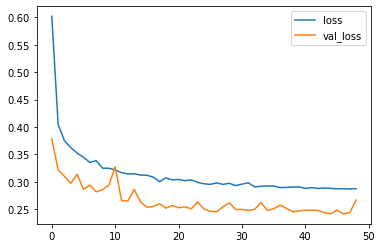

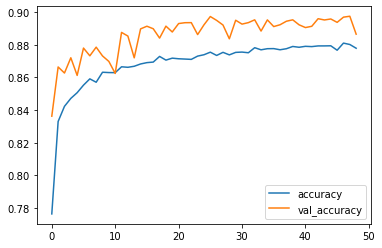

In [36]:
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

In [95]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = encoder.inverse_transform(y_pred)

### Creating Submission File

In [96]:
submission = pd.read_csv('sample_submission.csv')
submission['target'] = y_pred
submission.to_csv("submission.csv", index=False)
submission

ValueError: Length of values (30999) does not match length of index (100000)